# Generate Gene List for FunGen xQTL Analysis

## Overview
This analysis is trying to understand the functional pathway signals for the gene list we found from xQTL data. We are trying to answer the question -- we have limit genes overlapped with GVC and TWAS, does that true or we did incorrect analysis. For this, we need to answer it through: 
1. functional pathways enrichment 
    1. for GVC list -- to check the pathways for gold standard
    2. for genes in xQTL data we have -- to check the overview pathways we have;
    3. for specific genes in xQTL data only -- to check the additional pathways we have;
2. PPI analysis -- for the protein level evidence may show the indirect effect
3. Are xQTL-only genes missed by TWAS/GVC because they are tissue-specific/cell type specific? -- need to check the resource of those xQTL-only gene -- or aggregate
4. Identify if xQTL-only genes are regulators or targets in known gene regulatory circuits.
5. The prediction to disease? -- AUC

In [1]:
library(tidyverse)
library(data.table)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




### load gene lists

In [9]:
DNE_Aging_sig_xqtl = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/Aging_DNE/annotated_aging_new_dne_gene.tsv", sep= '\t')

In [10]:
DNE_Aging_sig_xqtl = unique(DNE_Aging_sig_xqtl)

In [11]:
head(DNE_Aging_sig_xqtl)

#chr,start,end,gene_id,strand,gene_name,event_ID
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
chr4,82430589,82461176,ENSG00000145293,+,ENOPH1,image_Aging1; Telomere_pc1
chr4,82818508,82901165,ENSG00000138674,-,SEC31A,image_Aging1; Telomere_pc1
chr4,82909972,83012925,ENSG00000189308,-,LIN54,image_Aging1; Telomere_pc1
chr6,27133041,27135290,ENSG00000196787,+,H2AC11,image_AD2; Telomere_pc1
chr6,27873147,27873533,ENSG00000275126,-,H4C13,image_AD2; Telomere_pc1
chr11,61752635,61788517,ENSG00000124920,+,MYRF,image_Aging5; mvage


In [12]:
dim(DNE_Aging_sig_xqtl)

[1] 17  7

In [13]:
all_genes = DNE_Aging_sig_xqtl |> pull(gene_name) |> unique() #
all_genes |> length()

[1] 17

## GO enrichment

### real gvc list - 20 genes from GVC table2

In [227]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# #BiocManager::install("GO.db", force = TRUE)

# #BiocManager::install("HDO.db")
# BiocManager::install("org.Hs.eg.db")

In [14]:
library(clusterProfiler)
library(org.Hs.eg.db)




clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are

### All genes 

In [15]:
# Run GO enrichment analysis for Biological Process (BP) for all genes
ego <- enrichGO(
  gene          = DNE_Aging_sig_xqtl$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0036109,GO:0036109,alpha-linolenic acid metabolic process,2/15,10/21261,2.083859e-05,0.004897068,0.003465786,ENSG00000134824/ENSG00000149485,2
GO:0043651,GO:0043651,linoleic acid metabolic process,2/15,22/21261,1.064494e-04,0.012507803,0.008852107,ENSG00000134824/ENSG00000149485,2
GO:0006636,GO:0006636,unsaturated fatty acid biosynthetic process,2/15,56/21261,6.998976e-04,0.054825311,0.038801340,ENSG00000134824/ENSG00000149485,2
GO:0046394,GO:0046394,carboxylic acid biosynthetic process,3/15,361/21261,1.897947e-03,0.091335797,0.064640788,ENSG00000145293/ENSG00000134824/ENSG00000149485,3
GO:0016053,GO:0016053,organic acid biosynthetic process,3/15,364/21261,1.943315e-03,0.091335797,0.064640788,ENSG00000145293/ENSG00000134824/ENSG00000149485,3
GO:0001676,GO:0001676,long-chain fatty acid metabolic process,2/15,118/21261,3.059056e-03,0.113176341,0.080097926,ENSG00000134824/ENSG00000149485,2


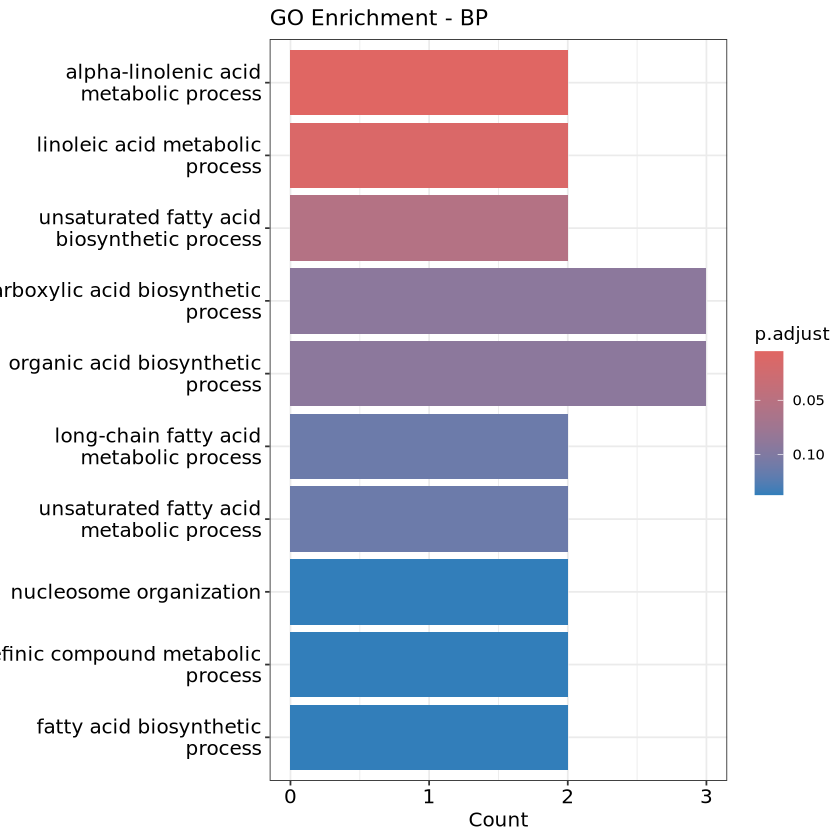

In [16]:
# View results
head(ego)

# Plot results
barplot(ego, showCategory = 10, title = "GO Enrichment - BP")

In [18]:
DNE_Aging_xQTL_ego_cc <- enrichGO(
  gene          = DNE_Aging_sig_xqtl$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [19]:
head(DNE_Aging_xQTL_ego_cc, n=5)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0000786,GO:0000786,nucleosome,2/16,137/22568,0.004151932,0.04652842,0.02671488,ENSG00000196787/ENSG00000275126,2
GO:0034992,GO:0034992,microtubule organizing center attachment site,1/16,11/22568,0.007772783,0.04652842,0.02671488,ENSG00000100242,1
GO:0034993,GO:0034993,meiotic nuclear membrane microtubule tethering complex,1/16,11/22568,0.007772783,0.04652842,0.02671488,ENSG00000100242,1
GO:0106083,GO:0106083,nuclear membrane protein complex,1/16,11/22568,0.007772783,0.04652842,0.02671488,ENSG00000100242,1
GO:0106094,GO:0106094,nuclear membrane microtubule tethering complex,1/16,11/22568,0.007772783,0.04652842,0.02671488,ENSG00000100242,1


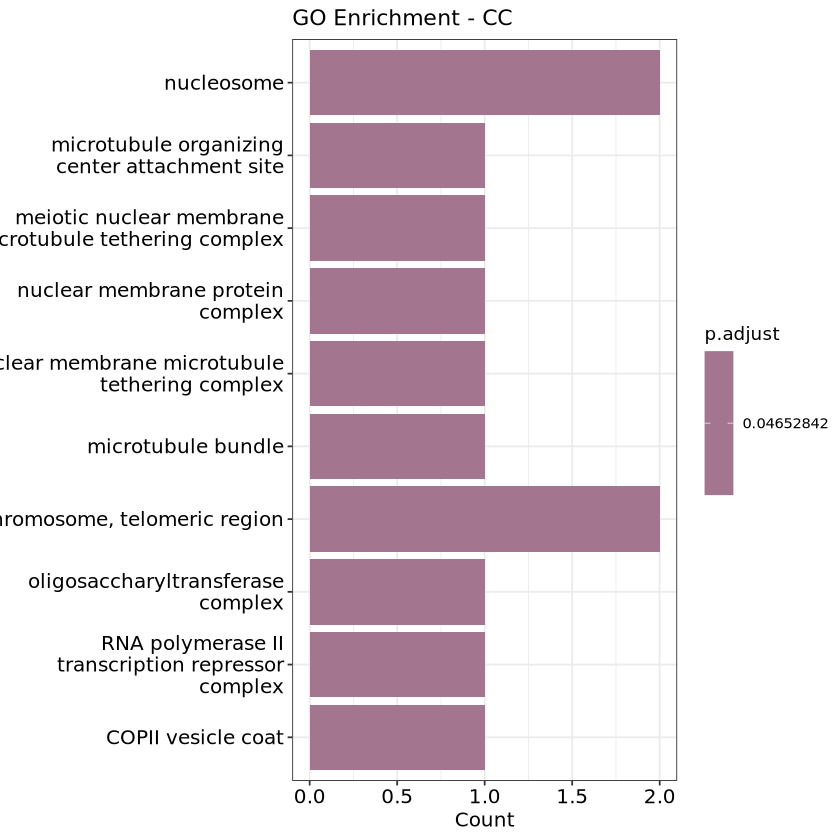

In [20]:
barplot(DNE_Aging_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [85]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_DNE_Aging_sig_xqtl_CC.pdf', width = 6, height = 6)

In [21]:
DNE_Aging_xQTL_ego_mf <- enrichGO(
  gene          = DNE_Aging_sig_xqtl$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(DNE_Aging_xQTL_ego_mf, n=5)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0016717,GO:0016717,"oxidoreductase activity, acting on paired donors, with oxidation of a pair of donors resulting in the reduction of molecular oxygen to two molecules of water",2/16,10/21059,0.0000242677,0.001019244,0.0006897137,ENSG00000134824/ENSG00000149485,2
GO:0030527,GO:0030527,structural constituent of chromatin,2/16,101/21059,0.0026158038,0.054931880,0.0371719488,ENSG00000196787/ENSG00000275126,2
GO:0016705,GO:0016705,"oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen",2/16,189/21059,0.0088513572,0.095356821,0.0645271721,ENSG00000134824/ENSG00000149485,2
GO:0003680,GO:0003680,minor groove of adenine-thymine-rich DNA binding,1/16,12/21059,0.0090816020,0.095356821,0.0645271721,ENSG00000189308,1
GO:0005521,GO:0005521,lamin binding,1/16,16/21059,0.0120915800,0.098571032,0.0667022023,ENSG00000100242,1


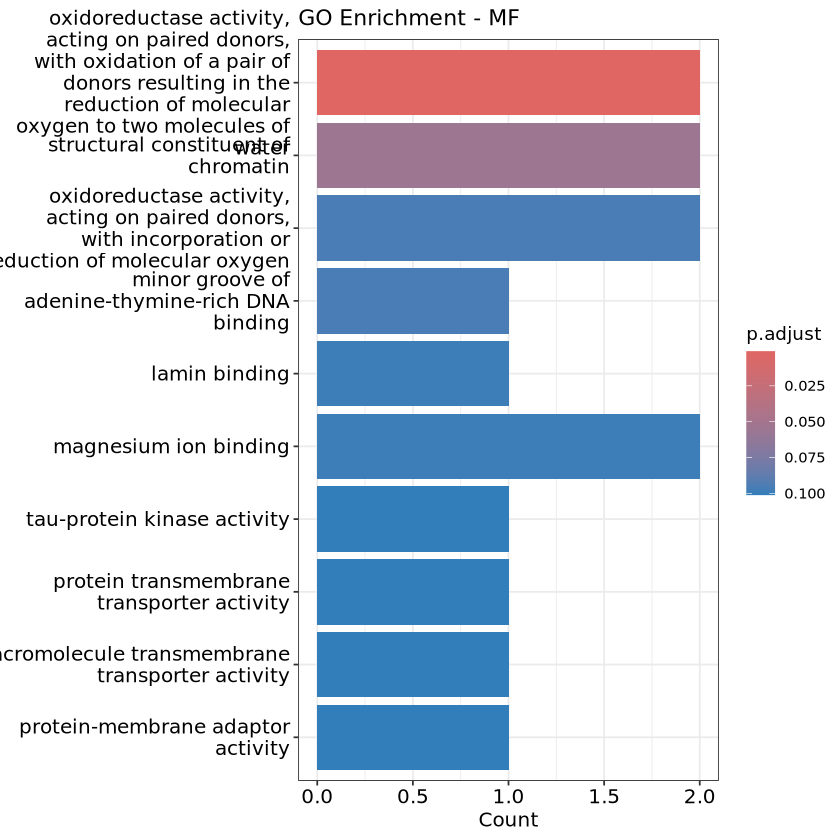

In [24]:
barplot(DNE_Aging_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

#### KEGG

**DNE_Aging**

In [25]:
entrez_ids <- bitr(DNE_Aging_sig_xqtl$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [30]:
entrez_ids |> filter(ENTREZID %in% c("9415","3992", "8969", "8368", "22872", "746"))

ENSEMBL,ENTREZID
<chr>,<chr>
ENSG00000138674,22872
ENSG00000196787,8969
ENSG00000275126,8368
ENSG00000134825,746
ENSG00000134824,9415
ENSG00000149485,3992


In [26]:
kegg_enrich %>% head(n=10)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa01040,Metabolism,Lipid metabolism,hsa01040,Biosynthesis of unsaturated fatty acids,2/10,27/9397,0.0003527374,0.005996536,0.003341723,9415/3992,2
hsa01212,Metabolism,Global and overview maps,hsa01212,Fatty acid metabolism,2/10,57/9397,0.0015767998,0.013402798,0.007469052,9415/3992,2
hsa05322,Human Diseases,Immune disease,hsa05322,Systemic lupus erythematosus,2/10,144/9397,0.0096814643,0.049430187,0.027546234,8969/8368,2
hsa04141,Genetic Information Processing,"Folding, sorting and degradation",hsa04141,Protein processing in endoplasmic reticulum,2/10,171/9397,0.0134592781,0.049430187,0.027546234,22872/746,2
hsa05034,Human Diseases,Substance dependence,hsa05034,Alcoholism,2/10,191/9397,0.0166121366,0.049430187,0.027546234,8969/8368,2
hsa04613,Organismal Systems,Immune system,hsa04613,Neutrophil extracellular trap formation,2/10,196/9397,0.0174459484,0.049430187,0.027546234,8969/8368,2
hsa00592,Metabolism,Lipid metabolism,hsa00592,alpha-Linolenic acid metabolism,1/10,26/9397,0.0273393731,0.066395620,0.037000655,9415,1
hsa00513,Metabolism,Glycan biosynthesis and metabolism,hsa00513,Various types of N-glycan biosynthesis,1/10,43/9397,0.0448494717,0.095305127,0.053111216,746,1
hsa00270,Metabolism,Amino acid metabolism,hsa00270,Cysteine and methionine metabolism,1/10,52/9397,0.0540042002,0.096964907,0.054036171,58478,1


In [27]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa01040,Metabolism,Lipid metabolism,hsa01040,Biosynthesis of unsaturated fatty acids,2/10,27/9397,0.0003527374,0.005996536,0.003341723,9415/3992,2
hsa01212,Metabolism,Global and overview maps,hsa01212,Fatty acid metabolism,2/10,57/9397,0.0015767998,0.013402798,0.007469052,9415/3992,2


category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [28]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) ## ATG13 & MAPK3

ENSEMBL,ENTREZID
<chr>,<chr>


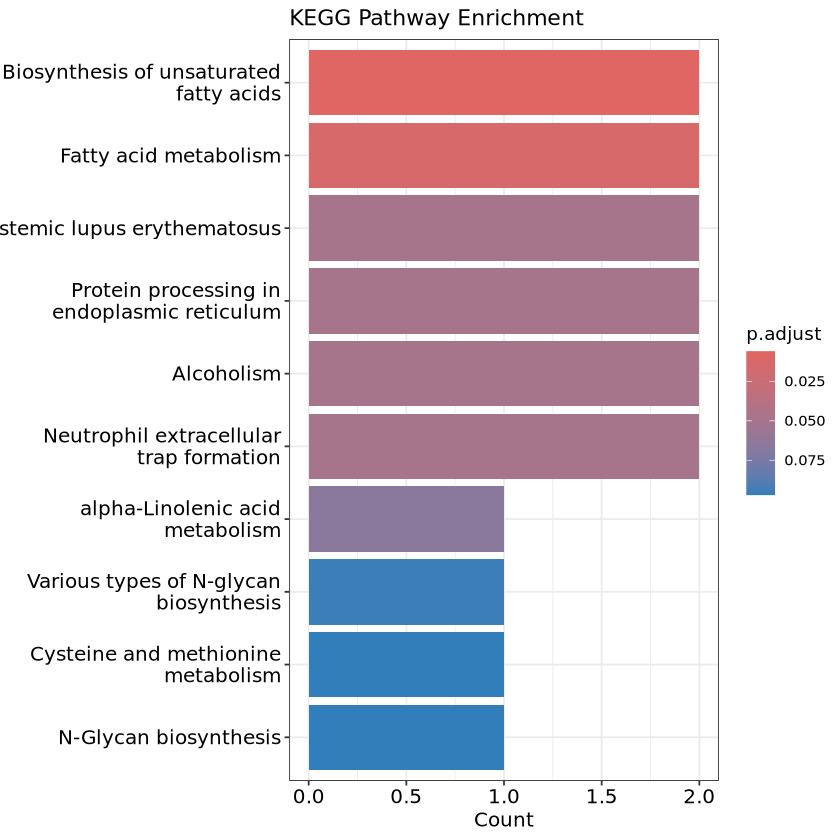

In [29]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [364]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_DNE_Aging_xqtl_KEGG.pdf', width = 6, height = 6)

## Other image traits are not enriched in Autophagy pathways